### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# faturamento total para cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# dataframe
faturamento_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

print("Faturamento por Loja:")
print(faturamento_df)

Faturamento por Loja:
     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


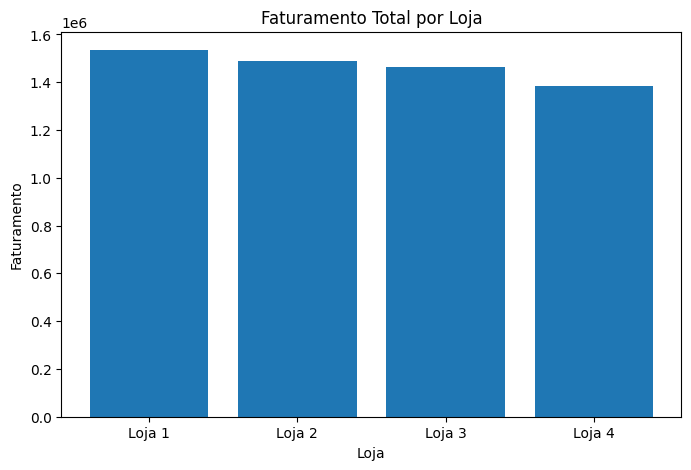

In [3]:
plt.figure(figsize=(8, 5))
plt.bar(faturamento_df['Loja'], faturamento_df['Faturamento'])
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.show()

# 2. Vendas por Categoria


In [4]:
# vendas por categoria para cada loja
vendas_por_categoria_loja1 = loja.groupby('Categoria do Produto').size().reset_index(name='Loja1')
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto').size().reset_index(name='Loja2')
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto').size().reset_index(name='Loja3')
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto').size().reset_index(name='Loja4')

# dataframe
vendas_por_categoria = pd.merge(vendas_por_categoria_loja1, vendas_por_categoria_loja2, on='Categoria do Produto', how='outer')
vendas_por_categoria = pd.merge(vendas_por_categoria, vendas_por_categoria_loja3, on='Categoria do Produto', how='outer')
vendas_por_categoria = pd.merge(vendas_por_categoria, vendas_por_categoria_loja4, on='Categoria do Produto', how='outer').fillna(0)

print("Vendas por Categoria em Cada Loja:")
print(vendas_por_categoria)

Vendas por Categoria em Cada Loja:
    Categoria do Produto  Loja1  Loja2  Loja3  Loja4
0             brinquedos    324    313    315    338
1       eletrodomesticos    312    305    278    254
2            eletronicos    448    422    451    451
3        esporte e lazer    284    275    277    277
4  instrumentos musicais    182    224    177    170
5                 livros    173    197    185    187
6                 moveis    465    442    499    480
7  utilidades domesticas    171    181    177    201


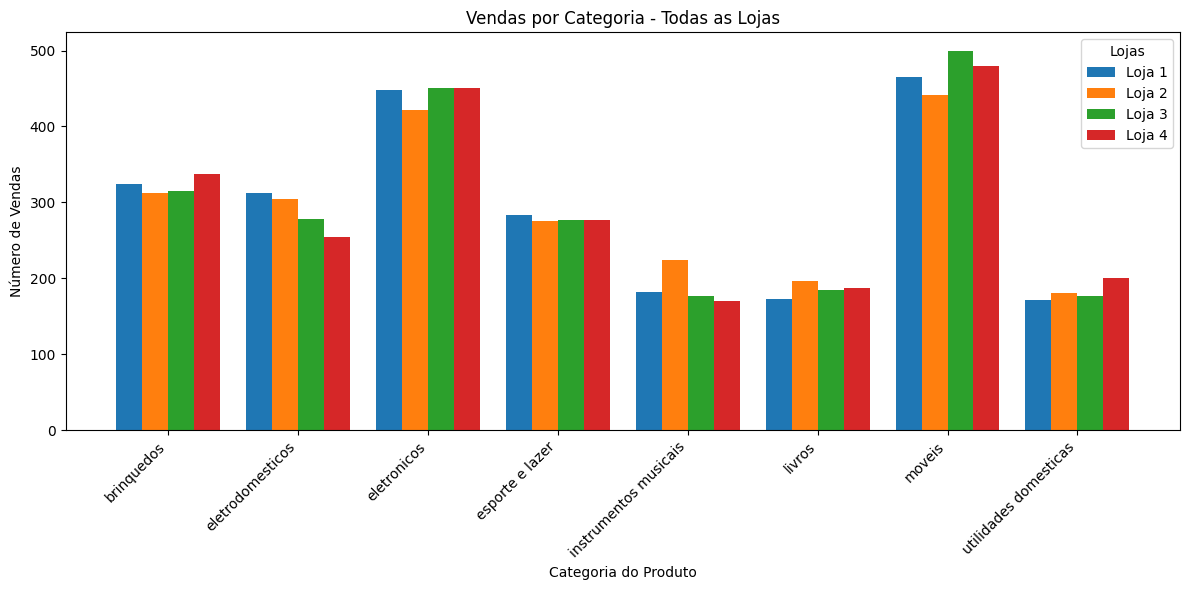

In [5]:
# categorias mais populares em cada loja
categorias = vendas_por_categoria['Categoria do Produto']
vendas_loja1 = vendas_por_categoria['Loja1']
vendas_loja2 = vendas_por_categoria['Loja2']
vendas_loja3 = vendas_por_categoria['Loja3']
vendas_loja4 = vendas_por_categoria['Loja4']

x = np.arange(len(categorias))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, vendas_loja1, width, label='Loja 1')
plt.bar(x - 0.5 * width, vendas_loja2, width, label='Loja 2')
plt.bar(x + 0.5 * width, vendas_loja3, width, label='Loja 3')
plt.bar(x + 1.5 * width, vendas_loja4, width, label='Loja 4')

plt.title('Vendas por Categoria - Todas as Lojas')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(x, categorias, rotation=45, ha='right')
plt.legend(title='Lojas')
plt.tight_layout()
plt.show()



Total de Vendas por Categoria (Todas as Lojas):
    Categoria do Produto  Loja1  Loja2  Loja3  Loja4  Total_Vendas
6                 moveis    465    442    499    480          1886
2            eletronicos    448    422    451    451          1772
0             brinquedos    324    313    315    338          1290
1       eletrodomesticos    312    305    278    254          1149
3        esporte e lazer    284    275    277    277          1113
4  instrumentos musicais    182    224    177    170           753
5                 livros    173    197    185    187           742
7  utilidades domesticas    171    181    177    201           730


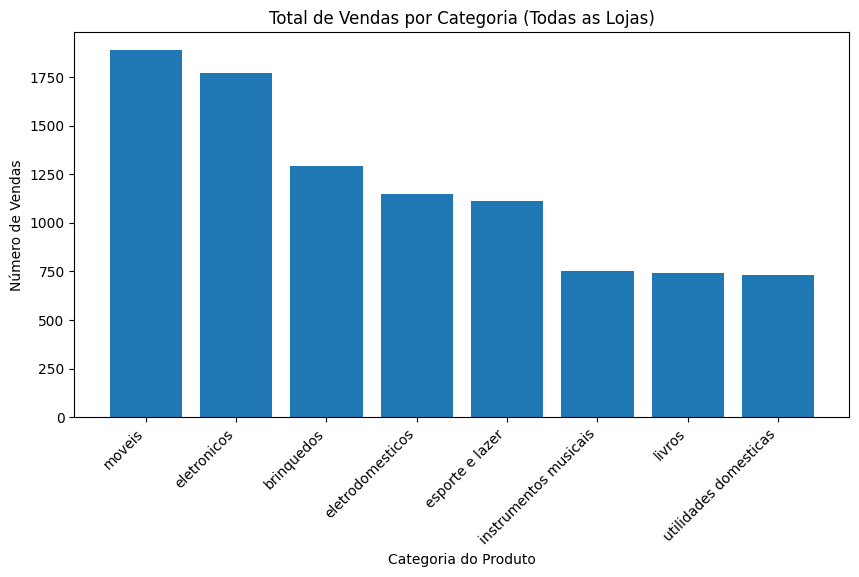

In [7]:
# total de vendas por categoria em todas as lojas
vendas_por_categoria['Total_Vendas'] = vendas_por_categoria['Loja1'] + vendas_por_categoria['Loja2'] + vendas_por_categoria['Loja3'] + vendas_por_categoria['Loja4']

# total de vendas
vendas_por_categoria_ordenado = vendas_por_categoria.sort_values(by='Total_Vendas', ascending=False)

print("\nTotal de Vendas por Categoria (Todas as Lojas):")
print(vendas_por_categoria_ordenado)

# total de vendas por categoria
plt.figure(figsize=(10, 5))
plt.bar(vendas_por_categoria_ordenado['Categoria do Produto'], vendas_por_categoria_ordenado['Total_Vendas'])
plt.title('Total de Vendas por Categoria (Todas as Lojas)')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Média de Avaliação das Lojas

In [8]:
# mêdia das avaliações da loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# dataframe
media_avaliacoes_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média da Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
})

print("Média das Avaliações por Loja:")
print(media_avaliacoes_df)

Média das Avaliações por Loja:
     Loja  Média da Avaliação
0  Loja 1            3.976685
1  Loja 2            4.037304
2  Loja 3            4.048326
3  Loja 4            3.995759


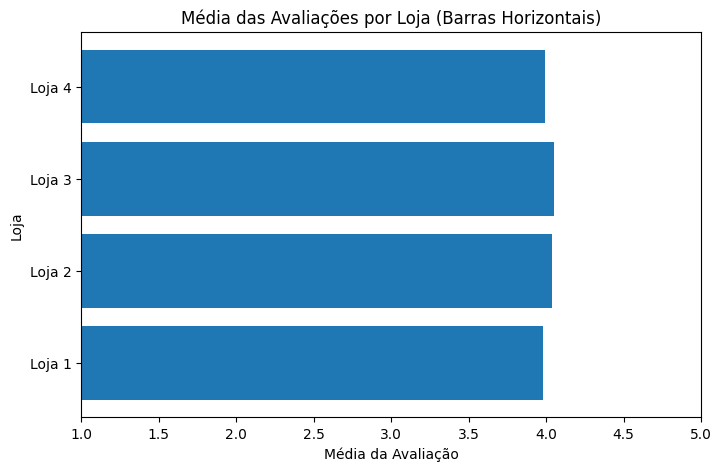

In [9]:
plt.figure(figsize=(8, 5))
plt.barh(media_avaliacoes_df['Loja'], media_avaliacoes_df['Média da Avaliação'])
plt.title('Média das Avaliações por Loja (Barras Horizontais)')
plt.xlabel('Média da Avaliação')
plt.ylabel('Loja')
plt.xlim(1, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [10]:
# vendas por produto em cada loja
vendas_por_produto_loja1 = loja.groupby('Produto').size().reset_index(name='Vendas_Loja1')
vendas_por_produto_loja2 = loja2.groupby('Produto').size().reset_index(name='Vendas_Loja2')
vendas_por_produto_loja3 = loja3.groupby('Produto').size().reset_index(name='Vendas_Loja3')
vendas_por_produto_loja4 = loja4.groupby('Produto').size().reset_index(name='Vendas_Loja4')

# DataFrames
vendas_por_produto = pd.merge(vendas_por_produto_loja1, vendas_por_produto_loja2, on='Produto', how='outer')
vendas_por_produto = pd.merge(vendas_por_produto, vendas_por_produto_loja3, on='Produto', how='outer')
vendas_por_produto = pd.merge(vendas_por_produto, vendas_por_produto_loja4, on='Produto', how='outer').fillna(0)

In [11]:
# mais e menos vendidos
def top_e_bottom_produtos_simples(df, loja_coluna, n=5):
    """
    Identifica os n produtos mais e menos vendidos em uma loja (versão simples).

    Args:
        df (pd.DataFrame): DataFrame com as vendas por produto.
        loja_coluna (str): Nome da coluna com os dados de vendas da loja.
        n (int): Número de produtos a retornar (top e bottom).

    Returns:
        pd.DataFrame: DataFrame com os produtos mais e menos vendidos.
    """
    top_produtos = df.sort_values(by=loja_coluna, ascending=False)[:n]
    bottom_produtos = df.sort_values(by=loja_coluna, ascending=True)[:n]
    return pd.concat([top_produtos, bottom_produtos])

top_bottom_loja1 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja1']], 'Vendas_Loja1')
top_bottom_loja2 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja2']], 'Vendas_Loja2')
top_bottom_loja3 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja3']], 'Vendas_Loja3')
top_bottom_loja4 = top_e_bottom_produtos_simples(vendas_por_produto[['Produto', 'Vendas_Loja4']], 'Vendas_Loja4')

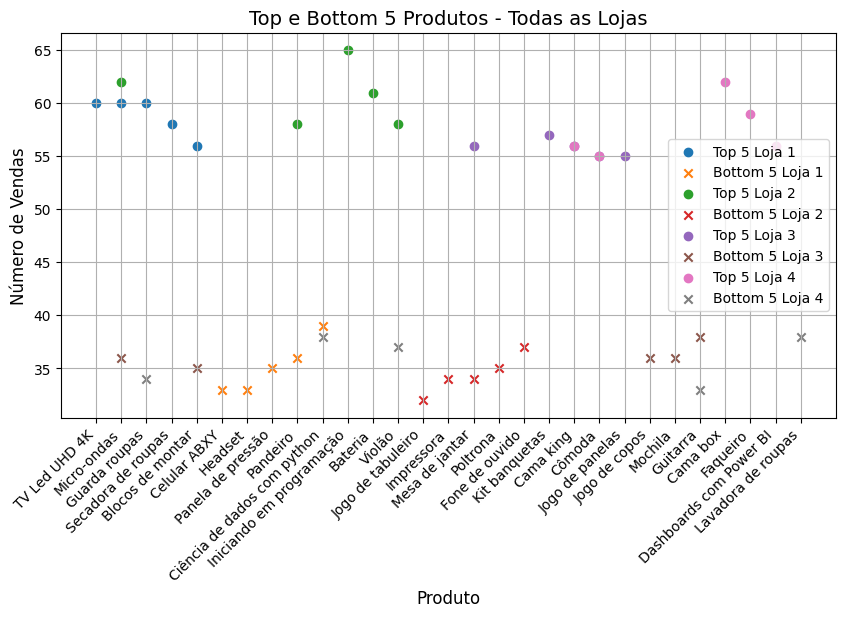

In [16]:
def plot_top_bottom_produtos_dispercao(df_list, loja_nome_list):
    """
    Plota os top e bottom 5 produtos mais vendidos de várias lojas usando um gráfico de dispersão.

    Args:
        df_list (list): Lista de DataFrames com os produtos mais vendidos de cada loja.
        loja_nome_list (list): Lista com os nomes das lojas.
    """
    plt.figure(figsize=(10, 5))

    for df, loja_nome in zip(df_list, loja_nome_list):

        top_data = df[:5]
        bottom_data = df[-5:]

        plt.scatter(top_data['Produto'], top_data[top_data.columns[1]], label=f'Top 5 {loja_nome}', marker='o')

        plt.scatter(bottom_data['Produto'], bottom_data[bottom_data.columns[1]], label=f'Bottom 5 {loja_nome}', marker='x')

    plt.title('Top e Bottom 5 Produtos - Todas as Lojas', fontsize=14)
    plt.ylabel('Número de Vendas', fontsize=12)
    plt.xlabel('Produto', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(True)
    plt.legend()  # Adiciona legenda para distinguir as lojas
    plt.show()

df_list = [top_bottom_loja1, top_bottom_loja2, top_bottom_loja3, top_bottom_loja4]
loja_nome_list = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plot_top_bottom_produtos_dispercao(df_list, loja_nome_list)


# 5. Frete Médio por Loja


In [ ]:
# custo médio de frete para cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# armazenando os resultados
frete_medio_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete_Medio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

print("Custo Médio de Frete por Loja:")
print(frete_medio_df)

Custo Médio de Frete por Loja:
     Loja  Frete_Medio
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


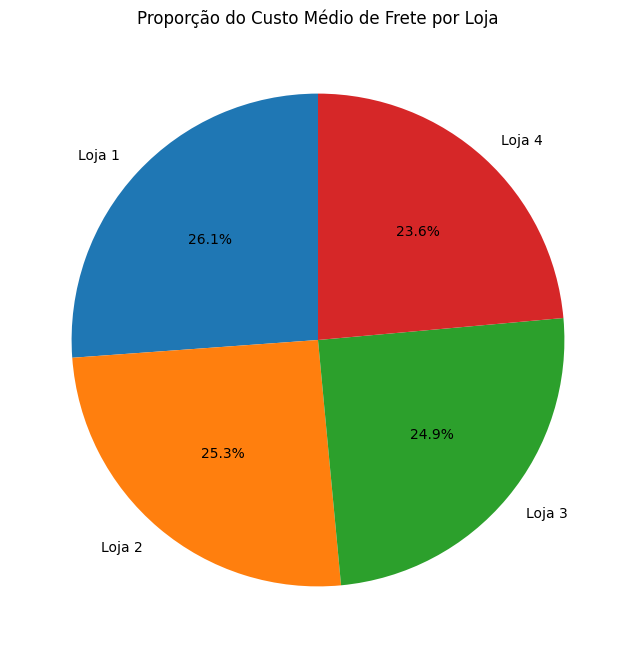

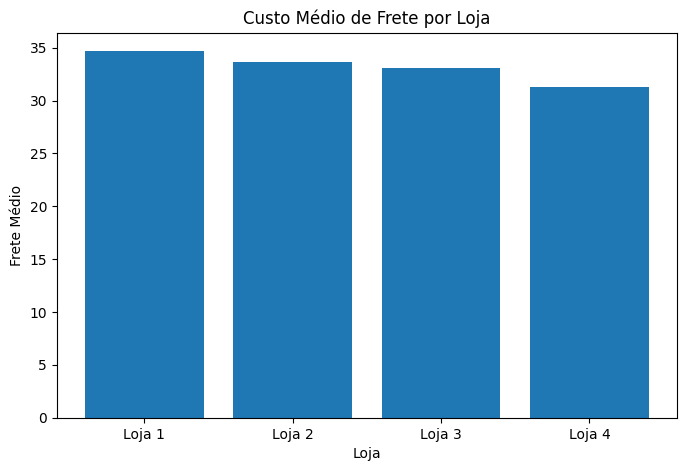

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(frete_medio_df['Frete_Medio'], labels=frete_medio_df['Loja'], autopct='%1.1f%%', startangle=90)
plt.title('Proporção do Custo Médio de Frete por Loja')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(frete_medio_df['Loja'], frete_medio_df['Frete_Medio'])
plt.title('Custo Médio de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.show()